In [45]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
data = pd.read_csv("bank-full.csv", delimiter = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [48]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [50]:
data["job"] = data["job"].astype('category').cat.codes
data["marital"] = data["marital"].astype('category').cat.codes
data["education"] = data["education"].astype('category').cat.codes
data["default"] = data["default"].astype('category').cat.codes
data["housing"] = data["housing"].astype('category').cat.codes
data["loan"] = data["loan"].astype('category').cat.codes
data["contact"] = data["contact"].astype('category').cat.codes
data["month"] = data["month"].astype('category').cat.codes
data["poutcome"] = data["poutcome"].astype('category').cat.codes
data["y"] = data["y"].astype('category').cat.codes
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [51]:
data.shape

(45211, 17)

In [52]:
x, y = data.values[:, :-1], data.values[:, -1]
x.shape

(45211, 16)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape

(31647, 16)

# Prunning code is taken from [here](https://github.com/krishnaik06/Post_Pruning_DecisionTre/blob/master/plot_cost_complexity_pruning.ipynb)

In [54]:
# pre prunning
model = DecisionTreeClassifier(random_state = 0)
param_grid = {
             "max_depth" : [2, 4, 6, 8, 10, 12, 14, 16],
             "min_samples_split" : [5, 10, 15, 20, 25, 30]
             }
gs = GridSearchCV(estimator = model, param_grid = param_grid)
gs.fit(x_train, y_train)
print("best parameters:", gs.best_estimator_)
print("best score:", gs.best_score_*100)

best parameters: DecisionTreeClassifier(max_depth=8, min_samples_split=25, random_state=0)
best score: 89.9105873637163


In [55]:
 
model = DecisionTreeClassifier(random_state = 0, max_depth = 10, max_features = "auto", min_samples_split = 10)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)) 
print("######################################") 

######################################
model score before pruning
test score 0.8939103509289296
######################################


[Text(166.22040441176472, 207.55636363636364, 'X[6] <= 0.5\ngini = 0.206\nsamples = 31647\nvalue = [27953, 3694]'),
 Text(94.52150735294117, 187.7890909090909, 'X[14] <= 0.5\ngini = 0.279\nsamples = 14039\nvalue = [11689, 2350]'),
 Text(48.29348262032086, 168.0218181818182, 'X[10] <= 0.5\ngini = 0.219\nsamples = 11870\nvalue = [10382, 1488]'),
 Text(12.495320855614974, 148.25454545454545, 'X[11] <= 136.5\ngini = 0.492\nsamples = 434\nvalue = [245, 189]'),
 Text(2.3871657754010696, 128.48727272727274, 'X[11] <= 92.5\ngini = 0.265\nsamples = 127\nvalue = [107, 20]'),
 Text(1.1935828877005348, 108.72, 'X[2] <= 0.5\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.5967914438502674, 88.95272727272729, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(1.7903743315508023, 88.95272727272729, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(3.5807486631016046, 108.72, 'X[3] <= 2.5\ngini = 0.349\nsamples = 80\nvalue = [62, 18]'),
 Text(2.983957219251337, 88.95272727272729, 'X[8] <= 1.

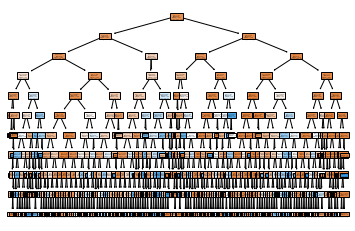

In [56]:
plt.figure()
tree.plot_tree(model, filled = True, label = "all") 

In [57]:
# post prunning
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas


array([0.00000000e+00, 1.07328271e-06, 1.50469389e-06, 1.62043958e-06,
       1.96950493e-06, 2.41494966e-06, 2.63321431e-06, 2.63524768e-06,
       2.68210689e-06, 2.77000467e-06, 3.46232597e-06, 4.18216391e-06,
       4.38031209e-06, 6.07866388e-06, 6.89423384e-06, 7.77810997e-06,
       8.27581641e-06, 8.27581641e-06, 9.12847628e-06, 9.50835449e-06,
       1.00540910e-05, 1.13019230e-05, 1.15861430e-05, 1.18822158e-05,
       1.24096209e-05, 1.25966155e-05, 1.38547584e-05, 1.42193573e-05,
       1.47460001e-05, 1.51983120e-05, 1.67286556e-05, 1.68525716e-05,
       1.78984917e-05, 1.80349053e-05, 1.80563267e-05, 1.85300684e-05,
       1.96073189e-05, 1.98503848e-05, 2.01879764e-05, 2.03133676e-05,
       2.07604143e-05, 2.10657145e-05, 2.11569081e-05, 2.17859099e-05,
       2.27091390e-05, 2.29022127e-05, 2.33227553e-05, 2.34595457e-05,
       2.41636137e-05, 2.46104261e-05, 2.46908715e-05, 2.52788574e-05,
       2.53446878e-05, 2.60346048e-05, 2.60427789e-05, 2.63032018e-05,
      

In [58]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

train_scores = []
test_scores = []

for model in models:
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))


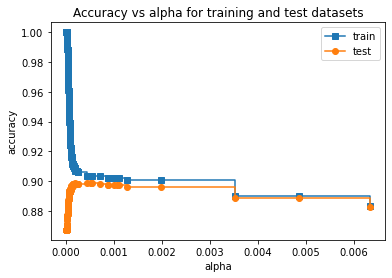

In [59]:
fig, ax = plt.subplots() 
ax.set_xlabel("alpha") 
ax.set_ylabel("accuracy") 
ax.set_title("Accuracy vs alpha for training and test datasets") 
ax.plot(ccp_alphas, train_scores, marker = "s", label = "train", drawstyle = "steps-post") 
ax.plot(ccp_alphas, test_scores, marker = "o", label = "test", drawstyle = "steps-post") 
#ax.set_xlim(0.00021, 0.00024)
ax.legend() 
plt.show() 

In [60]:
model = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.00022059) 
model.fit(x_train, y_train) 
print("######################################") 
print("model score after pruning")
print(model.score(x_test, y_test)) 
print("######################################") 

######################################
model score after pruning
0.8982601002654085
######################################


[Text(578.34375, 524.1857142857143, 'X[11] <= 518.5\ngini = 0.206\nsamples = 31647\nvalue = [27953, 3694]'),
 Text(415.01250000000005, 485.3571428571429, 'X[10] <= 9.5\ngini = 0.14\nsamples = 28154\nvalue = [26020, 2134]'),
 Text(309.225, 446.52857142857147, 'X[11] <= 204.5\ngini = 0.123\nsamples = 27366\nvalue = [25566, 1800]'),
 Text(218.55, 407.70000000000005, 'X[0] <= 60.5\ngini = 0.06\nsamples = 17370\nvalue = [16832, 538]'),
 Text(158.10000000000002, 368.8714285714286, 'X[15] <= 2.5\ngini = 0.054\nsamples = 17099\nvalue = [16620, 479]'),
 Text(93.0, 330.0428571428572, 'X[15] <= 1.5\ngini = 0.142\nsamples = 2837\nvalue = [2619, 218]'),
 Text(55.800000000000004, 291.2142857142857, 'X[6] <= 0.5\ngini = 0.072\nsamples = 2541\nvalue = [2446, 95]'),
 Text(37.2, 252.3857142857143, 'X[11] <= 157.5\ngini = 0.176\nsamples = 637\nvalue = [575, 62]'),
 Text(18.6, 213.55714285714288, 'gini = 0.1\nsamples = 491\nvalue = [465, 26]'),
 Text(55.800000000000004, 213.55714285714288, 'gini = 0.372\n

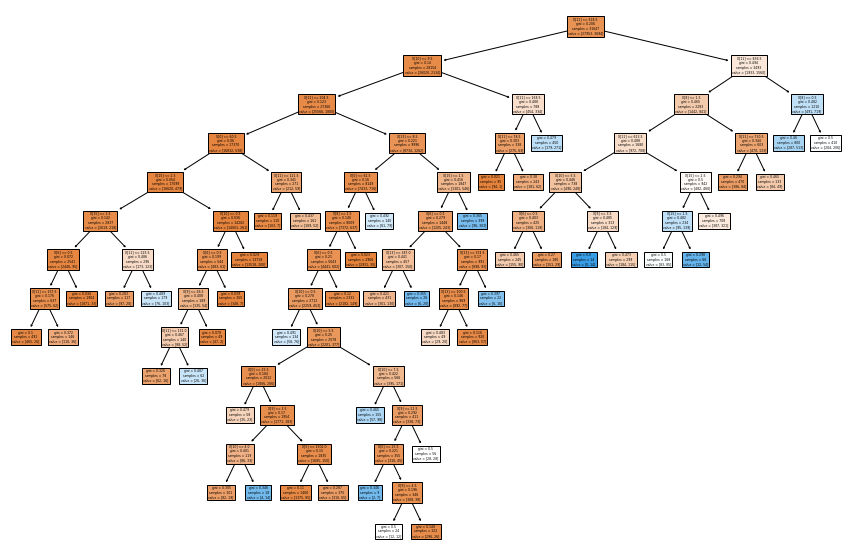

In [61]:
plt.figure(figsize = (15, 10))
tree.plot_tree(model, filled = True, label = "all") 


# Code for imbalance dataset classification is taken from [here](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

In [62]:
class_count_0, class_count_1 = data['y'].value_counts()

# Separate class
class_0 = data[data['y'] == 0]
class_1 = data[data['y'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
print('ratio of class 0 to class 1:', class_count_0/class_count_1)

class 0: (39922, 17)
class 1: (5289, 17)
ratio of class 0 to class 1: 7.548118737001324


# Classification using Random Undersampling

total class of 1 and 0:
 1    5289
0    5289
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

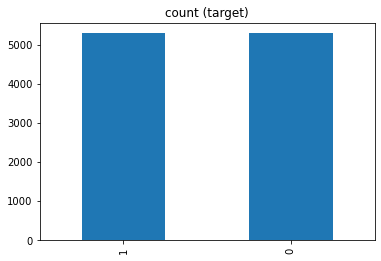

In [63]:
class_0_under = class_0.sample(class_count_1)

undersampled_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",undersampled_data['y'].value_counts())
# plot the count after under-sampeling
undersampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [64]:
undersampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15929,27,1,1,0,0,202,0,1,0,22,5,41,1,-1,0,3,0
8856,50,9,1,1,0,1616,1,1,2,4,6,142,11,-1,0,3,0
26005,30,1,1,1,0,631,1,0,0,19,9,174,2,-1,0,3,0
28895,35,0,2,1,0,1721,0,0,1,30,4,103,3,-1,0,3,0
9176,29,7,1,0,0,549,1,0,2,5,6,61,2,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,3,1
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1


In [65]:
x, y = undersampled_data.iloc[:, :-1], undersampled_data.iloc[:, -1]
print(x.shape, y.shape)

(10578, 16) (10578,)


In [66]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(7404, 16)

In [68]:
# pre prunning
model = DecisionTreeClassifier(random_state = 0)
param_grid = {"max_depth" : [2, 4, 8, 12, 16],
             "min_samples_split" : [5, 15, 25]
             }
gs = GridSearchCV(estimator = model, param_grid = param_grid)
gs.fit(x_train, y_train)
print("best parameters:", gs.best_estimator_)
print("best score:", gs.best_score_*100)

best parameters: DecisionTreeClassifier(max_depth=8, min_samples_split=25, random_state=0)
best score: 81.90160957716664


In [69]:
model = DecisionTreeClassifier(random_state = 0, max_depth = 8, max_features = "auto", min_samples_split = 25)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)) 
print("######################################") 

######################################
model score before pruning
test score 0.7857592942659105
######################################


In [70]:
# post prunning
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas


array([0.00000000e+00, 6.88894478e-06, 8.57253841e-06, 1.19297889e-05,
       1.67691875e-05, 1.92253508e-05, 2.54001381e-05, 2.66857253e-05,
       2.76191520e-05, 2.98253297e-05, 4.15575780e-05, 5.73777924e-05,
       7.06565131e-05, 7.31913082e-05, 7.96302464e-05, 8.76368700e-05,
       9.99319231e-05, 1.03695726e-04, 1.10533188e-04, 1.11355571e-04,
       1.11852694e-04, 1.22619544e-04, 1.29330593e-04, 1.34267645e-04,
       1.36810900e-04, 1.39883285e-04, 1.39986676e-04, 1.67771784e-04,
       1.76463949e-04, 1.87817011e-04, 2.00868250e-04, 2.05303206e-04,
       2.15942260e-04, 2.16177701e-04, 2.20601477e-04, 2.25629007e-04,
       2.27052204e-04, 2.33761376e-04, 2.36171399e-04, 2.42800549e-04,
       2.49080094e-04, 2.49527738e-04, 2.62202472e-04, 2.63675967e-04,
       2.66416397e-04, 2.71183568e-04, 2.77979367e-04, 2.86347237e-04,
       3.61791031e-04, 3.68636715e-04, 4.10343557e-04, 4.34615580e-04,
       4.68978924e-04, 5.68063062e-04, 5.92917131e-04, 7.72652457e-04,
      

In [71]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)

train_scores = []
test_scores = []

for model in models:
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))


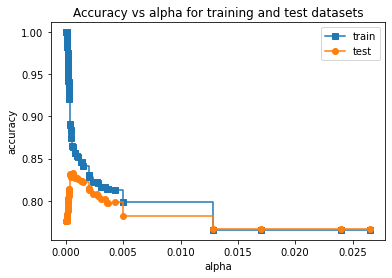

In [72]:
fig, ax = plt.subplots() 
ax.set_xlabel("alpha") 
ax.set_ylabel("accuracy") 
ax.set_title("Accuracy vs alpha for training and test datasets") 
ax.plot(ccp_alphas, train_scores, marker = "s", label = "train", drawstyle = "steps-post") 
ax.plot(ccp_alphas, test_scores, marker = "o", label = "test", drawstyle = "steps-post") 
#ax.set_xlim(0.0005, 0.004)
ax.legend() 
plt.show()

In [73]:
model = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.0025) 
model.fit(x_train, y_train) 
print("######################################") 
print("model score after pruning")
print(model.score(x_test, y_test)) 
print("######################################") 

######################################
model score after pruning
0.8081285444234405
######################################


# Classification using Random Oversampling

total class of 1 and 0: 1    39922
0    39922
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

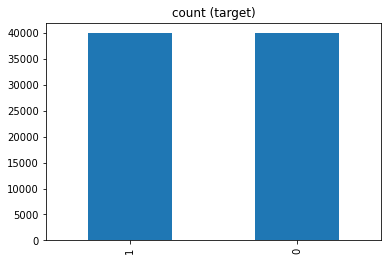

In [74]:
class_1_over = class_1.sample(class_count_0, replace=True)

oversampled_data = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",oversampled_data['y'].value_counts())
# plot the count after over-sampeling
oversampled_data['y'].value_counts().plot(kind='bar', title='count (target)')

In [75]:
oversampled_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42866,38,0,2,1,0,262,0,0,0,3,3,315,2,180,6,0,1
37457,34,4,2,2,0,3821,1,0,0,13,8,649,2,-1,0,3,1
7611,36,1,2,1,0,366,1,1,2,30,8,1133,2,-1,0,3,1
22481,46,2,1,2,0,1920,0,0,0,22,1,604,6,-1,0,3,1
33914,37,9,1,1,0,1458,0,0,0,30,0,281,1,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,4,1,2,0,138,1,1,0,16,9,162,2,187,5,0,0
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,3,0
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [76]:
x, y = oversampled_data.iloc[:, :-1], oversampled_data.iloc[:, -1]
print(x.shape, y.shape)

(79844, 16) (79844,)


In [77]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[0.25974026, 0.        , 1.        , ..., 0.20756881, 0.02181818,
        0.        ],
       [0.20779221, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.23376623, 0.09090909, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.20779221, 0.09090909, 1.        , ..., 0.60894495, 0.04363636,
        0.33333333],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.21674312, 0.04      ,
        0.33333333]])

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [79]:
model = DecisionTreeClassifier(random_state = 0, max_depth = 8, max_features = "auto", min_samples_split = 25)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)) 
print("######################################")

######################################
model score before pruning
test score 0.7497703932537363
######################################


# Classification using Synthetic Minority Oversampling Technique (SMOTE)


In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

x, y = data.iloc[:, :-1], data.iloc[:, -1]

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 39922, 1: 5289})
Resample dataset shape Counter({0: 39922, 1: 39922})


In [81]:
print(x_smote.shape, y_smote.shape)

(79844, 16) (79844,)


In [82]:
scaler = MinMaxScaler()
scaler.fit(x_smote)
x_scaled = scaler.transform(x_smote)
x_scaled

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.27272727, 0.36363636, 0.5       , ..., 0.10894495, 0.01454545,
        0.33333333],
       [0.44155844, 0.54545455, 0.5       , ..., 0.03899083, 0.00363636,
        0.66666667],
       [0.22077922, 0.81818182, 0.5       , ..., 0.08600917, 0.00363636,
        0.66666667]])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_smote, test_size = 0.3, random_state = 0)
x_train.shape

(55890, 16)

In [84]:
model = DecisionTreeClassifier(random_state = 0, max_depth = 8, max_features = "auto", min_samples_split = 25)
model.fit(x_train, y_train)
print("######################################") 
print("model score before pruning") 
print("test score", model.score(x_test, y_test)) 
print("######################################")

######################################
model score before pruning
test score 0.8503798947983635
######################################
